### 1.0 Import Libraries

In [3]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Data analysis and wrangling
import pandas as pd 
import numpy as np
import statistics
# for data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# For Dates Conversion
import datetime

# for selection of Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
# Import more libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
pd.set_option('max_rows', None)

### 2.0 Getting and Loading Dataset 

In [5]:
#Getting the dataset
import os

# Path of the file to read
Anz_trans_dataset_file_path ='../input/anz-synthesised-transaction-dataset'
Anz_dataset = (Anz_trans_dataset_file_path)
# Fill in the line below to read the file into a variable data
Anz_dataset = pd.read_csv('../input/anz-synthesised-transaction-dataset/anz.csv')

### 3.0 Exploratory Analysis

In [6]:
#checking columns
Anz_dataset.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
#checking info about the Anz_dataset
Anz_dataset.head()

print(Anz_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

There missing values in some columns

In [8]:
#printing data shape
print('Anz_dataset shape: ',Anz_dataset.shape)
#printing the number of rows
print('Number  of  rows: ',len(Anz_dataset))

Anz_dataset shape:  (12043, 23)
Number  of  rows:  12043


In [9]:
# checking statisics summary of Anz_dataset 
Anz_dataset.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Observation:

There is inconsistency and lots of zero values in merchant code column.It's probably a categorical column. 

#### 4.1 Checking for unique customers

In [10]:
# Checking for the 100 unique customers
print("Number  of  unique  customer  ID's:  ", Anz_dataset.customer_id.nunique())
print("Number  of  unique  transaction  ID's:  ", Anz_dataset.transaction_id.nunique()) 
print('Number  of  unique  accounts:  ', Anz_dataset.account.nunique())



Number  of  unique  customer  ID's:   100
Number  of  unique  transaction  ID's:   12043
Number  of  unique  accounts:   100


#### 4.2 Checking the format of Date

In [11]:
Anz_dataset.date.describe()
#Anz_dataset.date.count()

count         12043
unique           91
top       9/28/2018
freq            174
Name: date, dtype: object

Observation:

 One day is missing. Date format is consistent

### 5.0 Missing Values

In [12]:
#Checking for missing values

def missing_data(Anz_dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(Anz_dataset.isnull(), cbar=False)

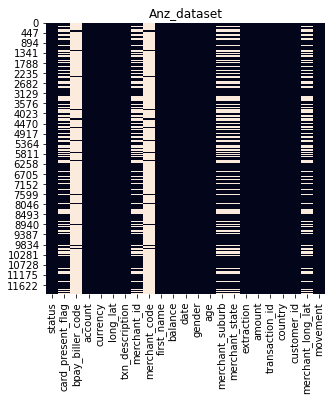

In [13]:
missing_data(Anz_dataset, "Anz_dataset")

Observantion:
    
The missing columns are evident from the graph

### 5.1 Checking Percentage of missing values

In [14]:
# checking percentage of missing values
missing_value = Anz_dataset.isnull().sum() 
missing_value = missing_value[missing_value > 0]
percentage_missing_value = round(missing_value / len(Anz_dataset), 3) * 100 

pd.DataFrame({"Number  of missing_value": missing_value,"Percentage": percentage_missing_value}).sort_values(by = "Percentage", ascending = False)


,Number of missing_value,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Observation:

merchant_code and bpay_biller_code have a high percentage of missing values.We are dropping the two columns due to high percentage of missing values.

### 5.2 Treating Null values

In [15]:
Anz_dataset.drop(columns=[ 'merchant_code','bpay_biller_code'],inplace=True)

In [16]:
#dropping  null  values  in   merchant  
df = pd.DataFrame(Anz_dataset.merchant_state) 
new_df = df.dropna()
new_df.head()



,merchant_state
0,QLD
1,NSW
2,NSW
3,QLD
4,QLD


#### Confirming the drop

In [17]:
missing_value = new_df.isnull().sum()
print(missing_value)
#Anz_dataset.head(2)

merchant_state    0
dtype: int64


In [18]:
Anz_dataset.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

## 6.0 Analysis of Features

#### Distribution plot function

### Analysis of gender and status

In [19]:
def bar_chart_compare(dataset, feature1, feature2=None, title = " txn_description by status and gender'"):
    plt.figure(figsize = [5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='balance', hue=feature2, ci=None, data=dataset).set_ylabel('txn_description')

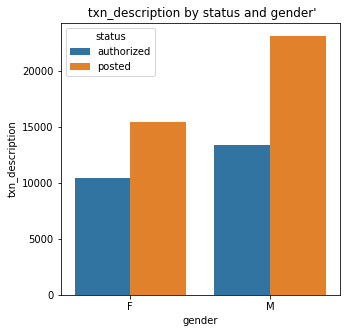

In [20]:
bar_chart_compare(Anz_dataset, "gender", "status")

There were more males authorized and posted than females

### Gender and Amount

Text(0.5, 1.0, 'amount')

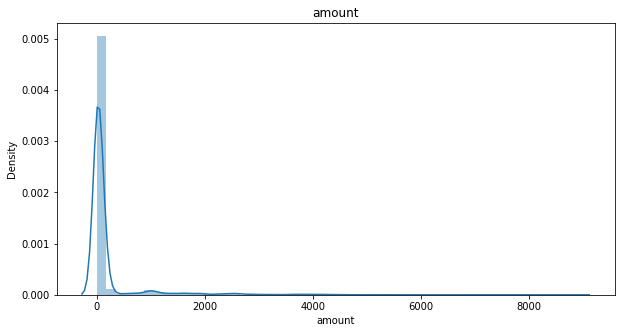

In [21]:
plt.figure(figsize =  (10,5)) 
sns.distplot(Anz_dataset.amount)
plt.title("amount")

amount distribution is right or positively skewed

Text(0.5, 1.0, ' amount Vs gender')

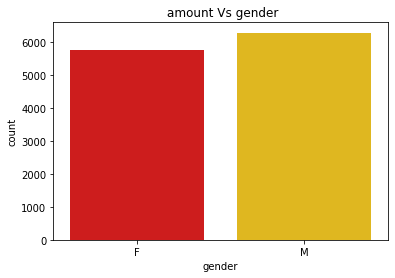

In [22]:
sns.countplot(x= 'gender',data = Anz_dataset,  palette ="hot") 
plt.title(' amount Vs gender')

Observation:

More males engaged in transation than females. the dsitribution

##### Transaction 

In [23]:
# checking Average 
tran_average = statistics.mean(Anz_dataset.amount)
print('average transactional amount is:',  round(tran_average, 2))


average transactional amount is: 187.93


In [24]:
Anz_dataset.groupby('txn_description').amount.mean()

txn_description
INTER BANK      86.699461
PAY/SALARY    1898.728029
PAYMENT         77.613077
PHONE BANK     106.099010
POS             40.407412
SALES-POS       39.909789
Name: amount, dtype: float64

In [25]:
# Statistical summary
Anz_dataset.groupby('txn_description').amount.describe()

,count,mean,std,min,25%,50%,75%,max
txn_description,,,,,,,,
INTER BANK,742.0,86.699461,198.706044,16.0,26.000,39.000,83.000,1956.00
PAY/SALARY,883.0,1898.728029,1150.364621,576.0,1013.670,1626.480,2538.680,8835.98
PAYMENT,2600.0,77.613077,152.310315,15.0,32.000,42.500,70.000,1981.00
PHONE BANK,101.0,106.099010,245.999695,21.0,36.000,43.000,67.000,1916.00
POS,3783.0,40.407412,165.771678,0.1,12.035,19.430,33.155,7081.09
SALES-POS,3934.0,39.909789,132.734185,0.1,12.160,20.035,34.575,4233.00


Observation:
    
There is a huge difference between the minimum and the maximum numbers. 
There is high confidence interval, it means the sample mean is not reliable.

### Analysizing Features gender and Number of transaction

Text(0.5, 1.0, ' Number of transaction Vs gender')

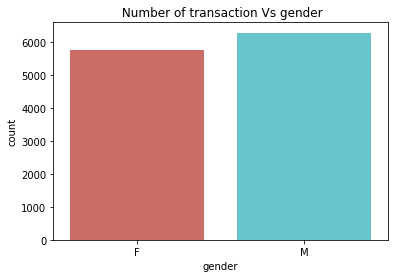

In [26]:
sns.countplot(x= 'gender',data = Anz_dataset,  palette ="hls") 
plt.title(' Number of transaction Vs gender')

Text(0.5, 1.0, 'Avg transaction vol by gender')

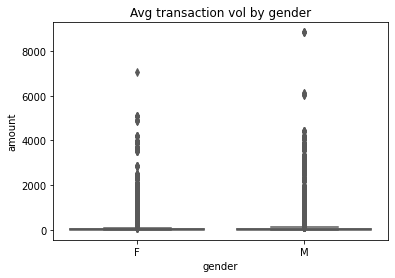

In [27]:
sns.boxplot(x= 'gender', y= 'amount', data = Anz_dataset, palette = "Set2") 
plt.title('Avg transaction vol by gender')

There are more male customers with transactions than females This is a confirmed case.                                               

In [28]:
#Average transaction volume by state and movement

Anz_dataset.merchant_suburb.dropna().head()

0          Ashmore
1           Sydney
2           Sydney
3          Buderim
4    Mermaid Beach
Name: merchant_suburb, dtype: object

In [29]:
Anz_dataset.card_present_flag.dropna().isnull().sum()

0

Observation:

PaySalary is the highest transaction, the margin is wide.

Text(0.5, 1.0, 'Avg transaction volume by category and movement')

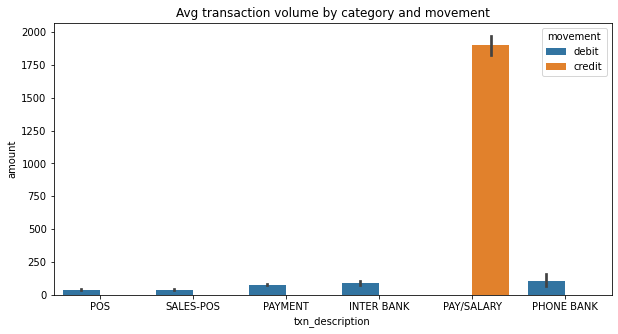

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(x='txn_description',y= 'amount',data = Anz_dataset, hue='movement',palette ="tab10")
plt.title('Avg transaction volume by category and movement')


Observations:
    
salaries have the highest transaction and were paid with credit. 
others used debit and no credit. There is high confidence interval,implying the sample mean was not reliable as an estimate of the true amount of the salary,Interbank and  Phone bank. 
This means the average portrayed is false.


In [31]:
def plot_swarm_movement(dataset, feature1, feature2, title, fize = (155)):
    fig, ax = plt.subplots(figsize=(18,5))
    # Turns off grid on the left Axis.
    ax.grid(True)
    plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y=feature1, x=feature2, hue='movement',data=Anz_dataset).set_title(title)

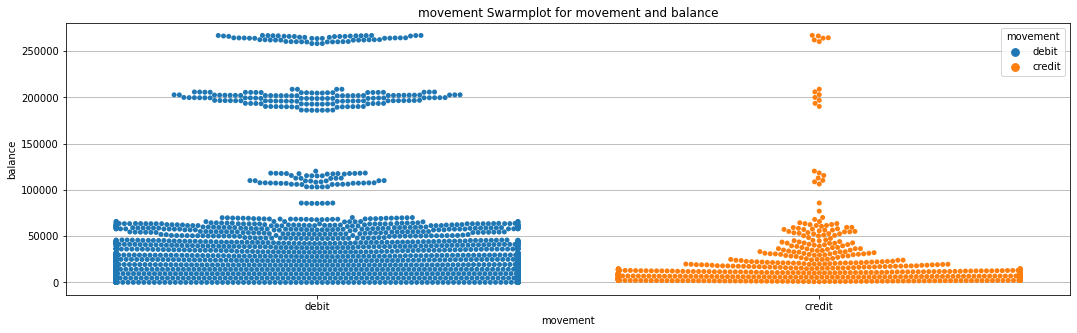

In [32]:
plot_swarm_movement(Anz_dataset,'balance','movement','movement Swarmplot for movement and balance')

From the swarm plot the debit is performing well than the credit.

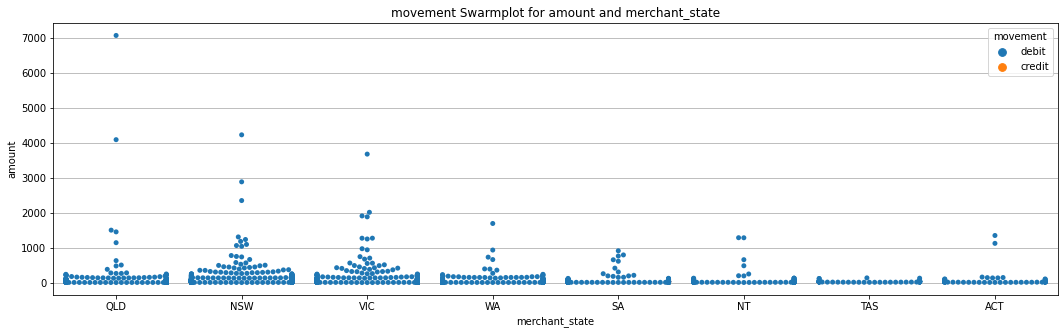

In [33]:
plot_swarm_movement(Anz_dataset,'amount','merchant_state','movement Swarmplot for amount and merchant_state')

ACT’s average transaction volume is the highest but it is the state with the lowest number of transaction. This means that, the company needs to focus on ACT since its average tranasaction is high. While the NSW and VIC have a high number of transactions, their average transactions volume is relatively low. Hence, little effort should be put there.

Text(0.5, 1.0, 'Number  transaction volume by state')

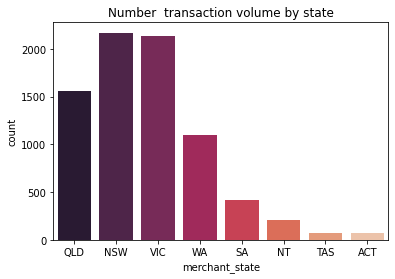

In [34]:
sns.countplot(x='merchant_state',data = Anz_dataset, palette ="rocket") 
plt.title('Number  transaction volume by state')

Observation:
There are more male customers with transactions than females ACT’s average transaction volume is the highest but it is the state with the lowest number of transaction

Text(0.5, 1.0, 'transaction Vs movement')

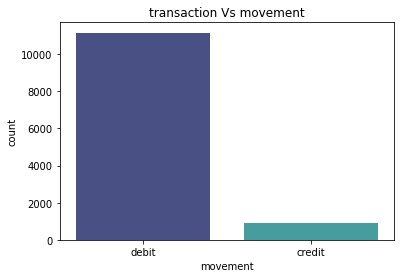

In [35]:
sns.countplot(x= 'movement',data = Anz_dataset,palette ="mako") 
plt.title('transaction Vs movement')

There are more debit transactions than credit

Text(0.5, 1.0, 'Average  transaction  volume  by  state  and  movement')

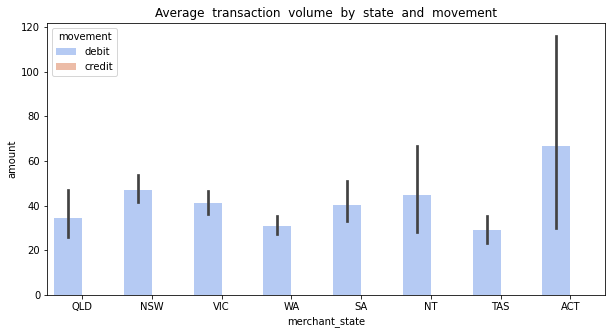

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(x='merchant_state', y='amount',data  = Anz_dataset,  hue='movement', palette  ="coolwarm")
plt.title('Average  transaction  volume  by  state  and  movement')


Observation:
    ACT has the highest average transaction volume but the variance is quite large.

### Age distribution

Text(0.5, 1.0, 'Age_Distribution')

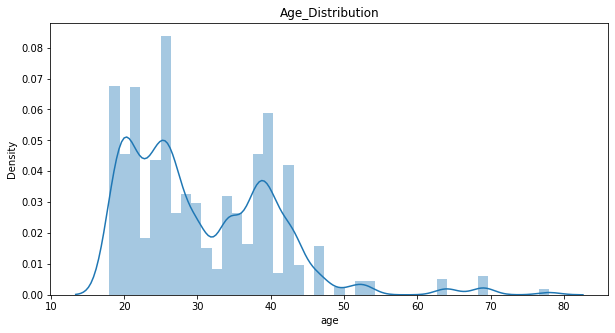

In [37]:
plt.figure(figsize =  (10,5)) 
sns.distplot(Anz_dataset.age)
plt.title("Age_Distribution")

lowest transactions came from people after 50 year while most of transactions came from people in 20’s.

#### Transaction Volume

In [38]:
daily = pd.DataFrame(Anz_dataset.groupby("date").amount.sum()) 
daily.head()

,amount
date,
10/1/2018,40823.03
10/10/2018,29399.50
10/11/2018,20851.67
10/12/2018,40658.20
10/13/2018,10140.81


Text(0, 0.5, 'Daily Transaction volume')

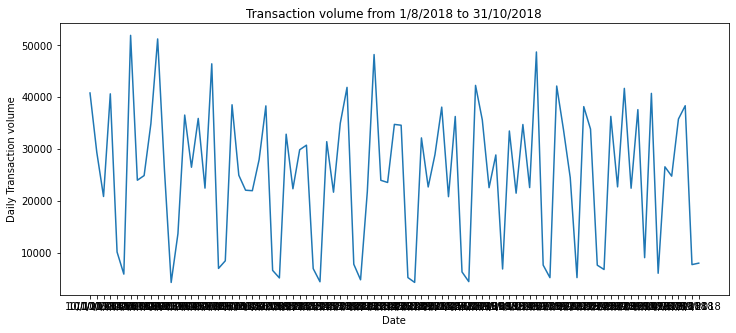

In [39]:
fig, ax = plt.subplots(figsize = (12, 5)) 
ax.plot(daily.index, daily.amount) 
plt.title("Transaction volume from 1/8/2018 to 31/10/2018") 
plt.xlabel("Date")
plt.ylabel("Daily Transaction volume")


There is a similiar of pattern of rising and dropping transcation volume

### Balance Distribution

<AxesSubplot:xlabel='balance'>

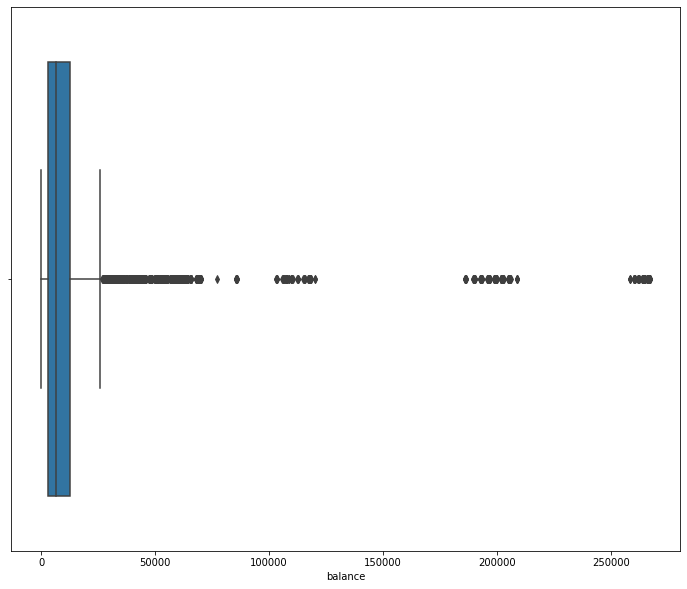

In [40]:
plt.figure(figsize = (12, 10)) 
sns.boxplot(Anz_dataset.balance)

Text(0.5, 1.0, 'Balance distribution')

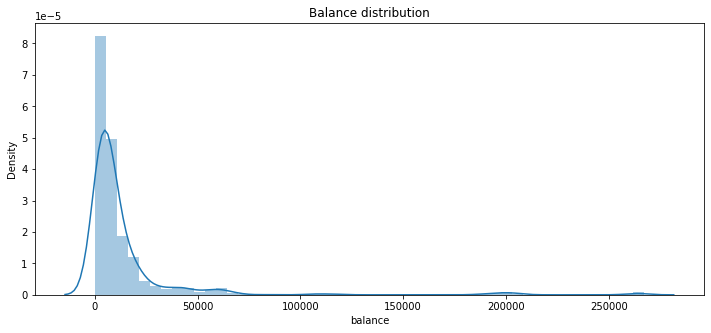

In [41]:
plt.figure(figsize = (12, 5)) 
sns.distplot(Anz_dataset.balance)
plt.title("Balance distribution")

The balance session is rightly skewed, hence, needs to be corrected before the model.

In [42]:
customer_monthly_volume  =  pd.DataFrame(Anz_dataset.groupby('customer_id').amount.
sum()/3)
customer_monthly_volume.head()


,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


In [43]:
 pd.DataFrame(Anz_dataset.groupby('customer_id').amount.sum())

,amount
customer_id,
CUS-1005756958,16268.97
CUS-1117979751,33984.37
CUS-1140341822,17010.60
CUS-1147642491,28980.82
CUS-1196156254,36050.72
CUS-1220154422,20596.11
CUS-1233833708,10385.54
CUS-1271030853,29079.78
CUS-127297539,21856.81


Text(0.5, 1.0, 'Customers transaction volume monthly')

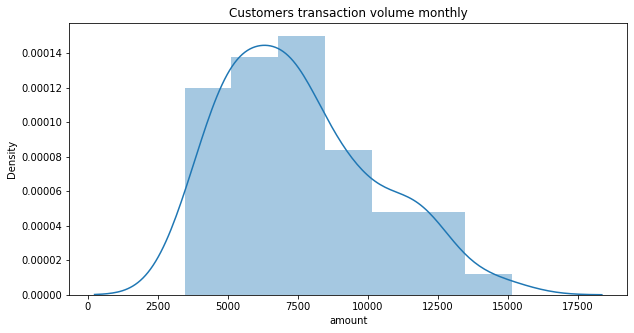

In [44]:
plt.figure(figsize = (10, 5)) 
sns.distplot(customer_monthly_volume.amount) 
plt.title("Customers transaction volume monthly")
 


<AxesSubplot:xlabel='amount'>

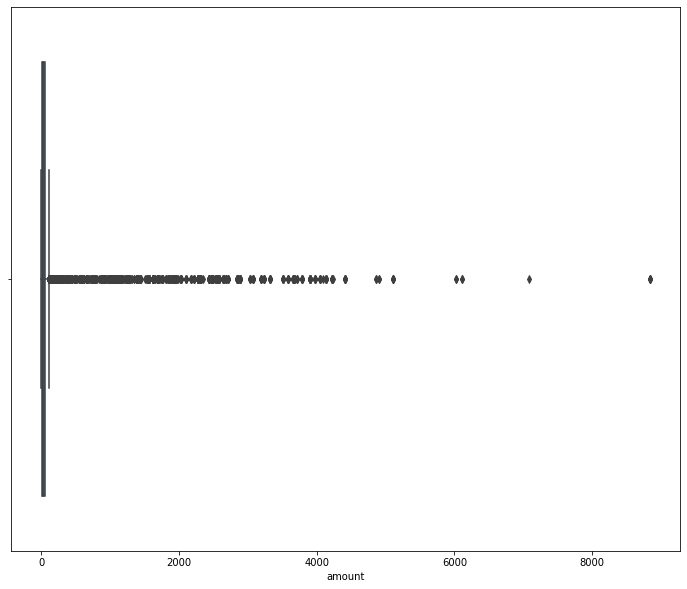

In [45]:
plt.figure(figsize = (12, 10))
sns.boxplot(Anz_dataset.amount)

The amount session is also rightly skewed and hence has to be transformed before the model.

### Checking Correlation

In [46]:
Anz_dataset.corr()

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000


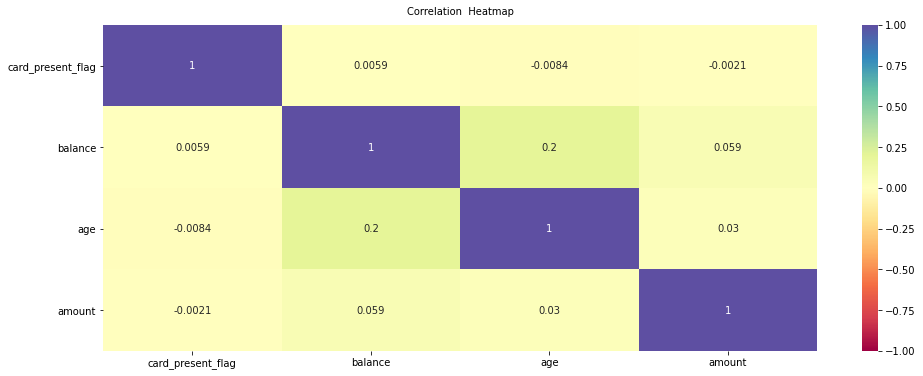

In [47]:
plt.figure(figsize=(16,  6))
heatmap  =  sns.heatmap(Anz_dataset.corr(),  vmin=-1,  vmax=1,  annot=True,  cmap='Spectral') 
heatmap.set_title('Correlation  Heatmap',fontdict={'fontsize':10},  pad=10);


There are correlation in the dataset,We do not need to drop any column.

In [68]:
Anz_dataset.head(1)
#type(Anz_dataset)

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,8/1/2018,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit


# Data@ANZ Programme Task2

## Predictive Analytics  Task

### Import more libraries

In [49]:
get_ipython().run_line_magic('matplotlib','inline')

### Reindexing

In [70]:
#print(Anz_dataset['status'])

In [109]:
#Anz_data=Anz_dataset.set_index('status')

### Creating more features

### Feature Annual Salary

In [113]:
#setting the background for seaborn
sns.set_style('ticks')
#exclude all except pay/salary in txn_description
Salary  =  Anz_dataset[(Anz_dataset['txn_description']  ==  'PAY/SALARY')]

#summing amount by customer id to sum up	all the salary during the 3 months Salary=  
Salary.pivot_table(index='customer_id',values='amount',aggfunc=np.sum) 
Salary.reset_index(inplace=True)
#creating annual  salary  by  multiplying  the  sum  of  amount  by  4(the  data  is 3 months data and so a year which is 12 months need to be multiplied by 4)
Salary['Annual_Salary'] = (round(Salary['amount']*4,2)) 
Salary.head()


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Annual_Salary
0,posted,NaN,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,8/1/2018,...,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,15615.80
1,posted,NaN,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,8/1/2018,...,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,6505.92
2,posted,NaN,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,8/1/2018,...,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,3933.44
3,posted,NaN,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,8/1/2018,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,5632.32
4,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,8/1/2018,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,4272.16


### Feature Annual Balance

In [116]:
#exclude all except pay/salary in txn_description
Balance  =  Anz_dataset[(Anz_dataset['txn_description']  ==  'PAY/SALARY')]
#summing amount by customer id to sum up	all  the  balance  during  the  3  months
Balance=  Balance.pivot_table(index='customer_id',values='balance',aggfunc=np.sum)
Balance.reset_index(inplace=True)


In [117]:
#creating annual balance  by  multiplying  the  sum  of  amount  by  4(the  data  is  3␣months data and so a year which is 12 months need to be multiplied by 4)
Balance['Annual_balance']  =  (round(Balance['balance']*4,2)) 
Balance.head()


,customer_id,balance,Annual_balance
0,CUS-1005756958,61342.65,245370.60
1,CUS-1117979751,83700.42,334801.68
2,CUS-1140341822,35050.32,140201.28
3,CUS-1147642491,114575.08,458300.32
4,CUS-1196156254,166920.02,667680.08


### Feature Expenses

In [118]:
#exclude credit in movement.
Expense  =  Anz_dataset[Anz_dataset['movement']  ==  'debit']
#summing amount by customer id to sum up the expenses  during  the  3  months
Expense  =  Expense.pivot_table(index='customer_id',values='amount',aggfunc=np.sum)
#creating annual  expenses  by  multiplying  the  sum  of  amount  by  4(the  data  is 3␣months data and so a year which is 12 months need to be multiplied by 4)
Expense['Annual_Expense']  =  round(Expense['amount']*4) 
Expense.reset_index(inplace=True)
Expense.head()


,customer_id,amount,Annual_Expense
0,CUS-1005756958,3652.86,14611.0
1,CUS-1117979751,8933.82,35735.0
2,CUS-1140341822,5511.54,22046.0
3,CUS-1147642491,6732.75,26931.0
4,CUS-1196156254,8724.61,34898.0


## Distribution Plots

Text(0.5, 1.0, 'Annual_balance dist')

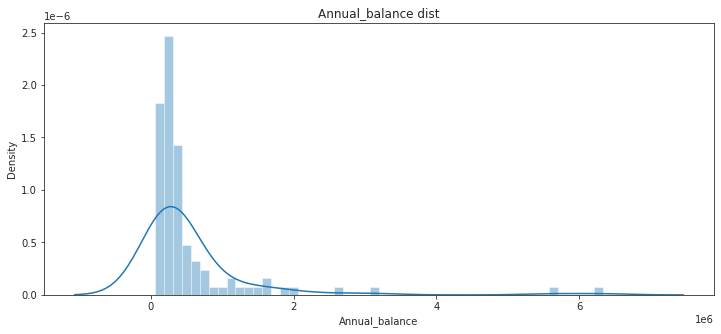

In [119]:
plt.figure(figsize = (12,5)) 
sns.distplot(Balance.Annual_balance) 
plt.title("Annual_balance dist")

Text(0.5, 1.0, 'Annual_Expense dist')

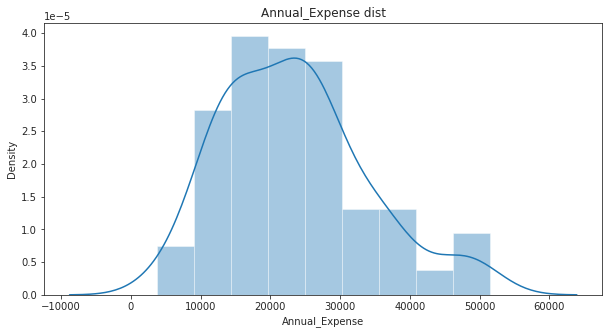

In [120]:
plt.figure(figsize = (10,5)) 
sns.distplot(Expense.Annual_Expense) 
plt.title("Annual_Expense dist")

Text(0.5, 1.0, 'Annual_balance dist')

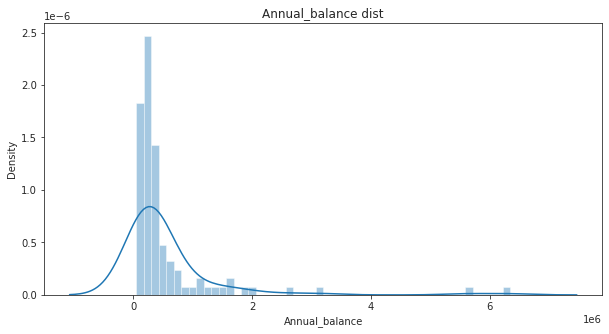

In [121]:
plt.figure(figsize = (10,5)) 
sns.distplot(Balance.Annual_balance) 
plt.title("Annual_balance dist")

Text(0.5, 1.0, 'Annual_Salary dist')

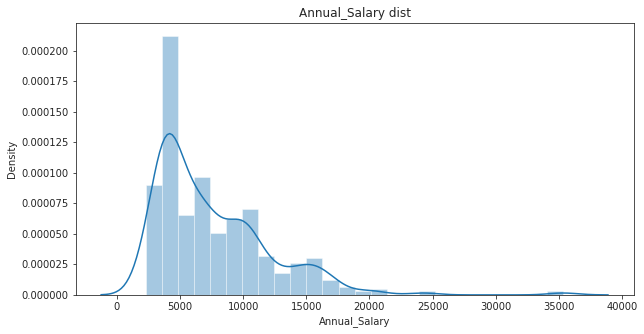

In [122]:
plt.figure(figsize = (10,5)) 
sns.distplot(Salary.Annual_Salary)
plt.title("Annual_Salary dist")

#### Merging age and gender with new feaures created

In [123]:
Salary=pd.merge(Salary,Anz_dataset[['customer_id','age','gender']],on='customer_id',how='left')
Salary.drop_duplicates(inplace=True) 
Salary.head()


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Annual_Salary,age_y,gender_y
0,posted,NaN,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,8/1/2018,...,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,15615.80,23,M
116,posted,NaN,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,8/1/2018,...,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,6505.92,23,F
200,posted,NaN,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,8/1/2018,...,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,3933.44,22,M
247,posted,NaN,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,8/1/2018,...,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,5632.32,24,M
402,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,8/1/2018,...,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,4272.16,43,F


### Merging balance data with salary data

In [124]:
Salary = pd.merge(Salary,Expense,on='customer_id',how='left') 
Salary.drop_duplicates(inplace=True)
Salary.head()


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,transaction_id,country,customer_id,merchant_long_lat,movement,Annual_Salary,age_y,gender_y,amount_y,Annual_Expense
0,posted,NaN,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,8/1/2018,...,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,15615.80,23,M,7183.55,28734.0
1,posted,NaN,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,8/1/2018,...,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,6505.92,23,F,3637.50,14550.0
2,posted,NaN,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,8/1/2018,...,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,3933.44,22,M,1920.93,7684.0
3,posted,NaN,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,8/1/2018,...,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,5632.32,24,M,5706.80,22827.0
4,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,8/1/2018,...,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,4272.16,43,F,7359.56,29438.0


### Merging Expense to data

In [126]:
Salary=pd.merge(Salary,Expense,on='customer_id',  how='left') 
Salary.drop_duplicates(inplace=True)
Salary.head()


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,customer_id,merchant_long_lat,movement,Annual_Salary,age_y,gender_y,amount_y,Annual_Expense_x,amount,Annual_Expense_y
0,posted,NaN,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,8/1/2018,...,CUS-1462656821,NaN,credit,15615.80,23,M,7183.55,28734.0,7183.55,28734.0
1,posted,NaN,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,8/1/2018,...,CUS-2500783281,NaN,credit,6505.92,23,F,3637.50,14550.0,3637.50,14550.0
2,posted,NaN,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,8/1/2018,...,CUS-326006476,NaN,credit,3933.44,22,M,1920.93,7684.0,1920.93,7684.0
3,posted,NaN,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,8/1/2018,...,CUS-1433879684,NaN,credit,5632.32,24,M,5706.80,22827.0,5706.80,22827.0
4,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,8/1/2018,...,CUS-4123612273,NaN,credit,4272.16,43,F,7359.56,29438.0,7359.56,29438.0


#### Dropping irrelevant columns 

In [1]:
Salary.drop(columns  =['customer_id','amount_x','amount_y','balance'],  inplace=True)


NameError: name 'Salary' is not defined

In [101]:
Salary.corr()

,card_present_flag,balance_x,age_x,amount_x,Annual_Salary,balance_y,Annual_balance,age_y,amount_y,Annual_Expense
card_present_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance_x,NaN,1.000000,0.194956,0.287501,0.287501,0.947902,0.947902,0.194956,-0.029459,-0.029458
age_x,NaN,0.194956,1.000000,-0.138594,-0.138594,0.266475,0.266475,1.000000,-0.129759,-0.129756
amount_x,NaN,0.287501,-0.138594,1.000000,1.000000,0.168799,0.168799,-0.138594,0.136347,0.136344
Annual_Salary,NaN,0.287501,-0.138594,1.000000,1.000000,0.168799,0.168799,-0.138594,0.136347,0.136344
balance_y,NaN,0.947902,0.266475,0.168799,0.168799,1.000000,1.000000,0.266475,-0.045374,-0.045371
Annual_balance,NaN,0.947902,0.266475,0.168799,0.168799,1.000000,1.000000,0.266475,-0.045374,-0.045371
age_y,NaN,0.194956,1.000000,-0.138594,-0.138594,0.266475,0.266475,1.000000,-0.129759,-0.129756
amount_y,NaN,-0.029459,-0.129759,0.136347,0.136347,-0.045374,-0.045374,-0.129759,1.000000,1.000000
Annual_Expense,NaN,-0.029458,-0.129756,0.136344,0.136344,-0.045371,-0.045371,-0.129756,1.000000,1.000000


In [103]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 882
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_present_flag  0 non-null      float64
 1   account            883 non-null    object 
 2   currency           883 non-null    object 
 3   long_lat           883 non-null    object 
 4   txn_description    883 non-null    object 
 5   merchant_id        0 non-null      object 
 6   first_name         883 non-null    object 
 7   balance_x          883 non-null    float64
 8   date               883 non-null    object 
 9   gender_x           883 non-null    object 
 10  age_x              883 non-null    int64  
 11  merchant_suburb    0 non-null      object 
 12  merchant_state     0 non-null      object 
 13  extraction         883 non-null    object 
 14  amount_x           883 non-null    float64
 15  transaction_id     883 non-null    object 
 16  country            883 non

#### Encoding

In [104]:
Salary= pd.get_dummies(Salary,columns=['gender_x','gender_y'])

In [105]:
Salary.head()

,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance_x,date,age_x,...,Annual_Salary,balance_y,Annual_balance,age_y,amount_y,Annual_Expense,gender_x_F,gender_x_M,gender_y_F,gender_y_M
0,NaN,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,8/1/2018,23,...,15615.80,111215.39,444861.56,23,7183.55,28734.0,0,1,0,1
1,NaN,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,8/1/2018,23,...,6505.92,150375.30,601501.20,23,3637.50,14550.0,1,0,1,0
2,NaN,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,8/1/2018,22,...,3933.44,116438.43,465753.72,22,1920.93,7684.0,0,1,0,1
3,NaN,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,8/1/2018,24,...,5632.32,27141.67,108566.68,24,5706.80,22827.0,0,1,0,1
4,NaN,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,8/1/2018,43,...,4272.16,72949.87,291799.48,43,7359.56,29438.0,1,0,1,0


#### Linear regression model

In [106]:
x  = Salary.drop('Annual_Salary',axis='columns') 
y =Salary['Annual_Salary']

In [107]:
#linear regression model
reg = linear_model.LinearRegression()
#split the data into 70% training and 33% testing data
x_train,  x_test,  y_train,  y_test= train_test_split(x,y,  test_size=0.3,random_state=7)
#train the  model
reg.fit(x_train, y_train)
print(reg.coef_)

ValueError: could not convert string to float: 'ACC-2897221629'

In [ ]:
y_pred = reg.predict(x_test) 
print(y_pred)

In [ ]:
#print the actual values
print(y_test)

In [ ]:
reg.score(x_train,y_train)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,  0,  0))


In [ ]:
ax.plot([y_test.min(),  y_test.max()],  [y_test.min(),  y_test.max()],  'k--',lw=4) 
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted') 
ax.set_title("Annual Salary vs Predicted")
plt.show()


## DECISION TREE

In [ ]:
x =Salary.drop('Annual_Salary',axis='columns') y=Salary['Annual_Salary']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=7)
 dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=7)


In [ ]:
dt.fit(x_train, y_train)

In [ ]:
print(y_test)

In [ ]:
dt.score(x_train,y_train)
mse_dt = MSE(y_test, y_pred)

In [ ]:
Conclusion
The Decision Tree performed better than the linear regression. The DecisionTreeRegressor achieved a score of 56% while the linear regression was 17%. The RMSE of the model over the whole dataset is over 20000, which indicates the inaccuracy of the model.  It is thus risky to use this linear model to predict customers’ income bracket. More data is required to develop a more reliable model.


## RANDOM FOREST

In [ ]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state =1)

# fit your model
rf_model.fit(train_X, train_y)
predictions=rf_model.predict(x_test)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(predictions,val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

In [ ]:
y_pred = reg.predict(x_test) 
print(y_pred)

## Data Analysis